In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os,sys
sys.path.append(os.path.realpath('FGW distance on graph/lib'))
from graph import Graph
from ot_distances import Fused_Gromov_Wasserstein_distance
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

In [3]:
from synthetic_graphs import *
from solver import *

### Generate and test our graphs

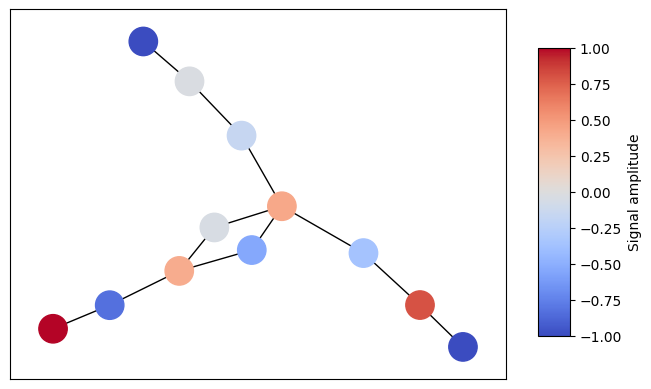

Mean and std:  (-0.11085137895911579, 0.6440951254009702)
Laplacian quadratic form:  13.628774980057763


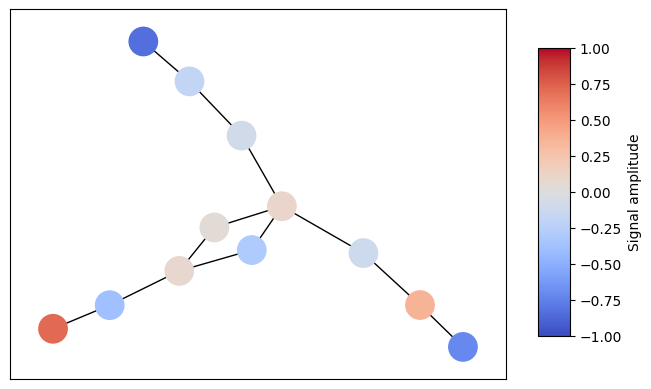

Mean and std:  (-0.11085137895911573, 0.41105103320228065)
Laplacian quadratic form:  3.645596084638484


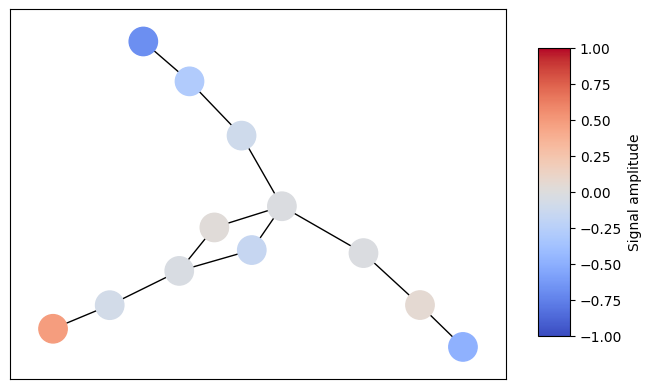

Mean and std:  (-0.11085137895911573, 0.27731596592451974)
Laplacian quadratic form:  0.8562898368506452


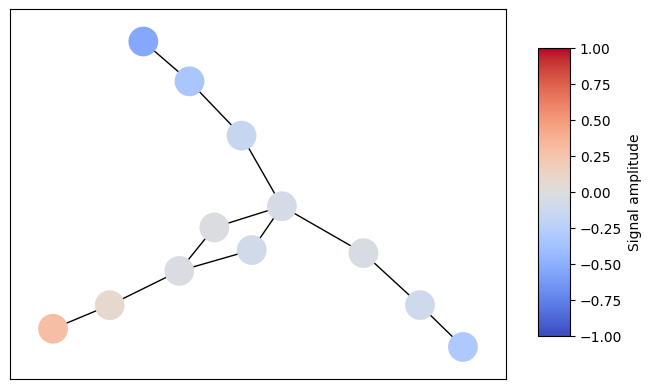

Mean and std:  (-0.11085137895911575, 0.205199891108047)
Laplacian quadratic form:  0.199665867088514


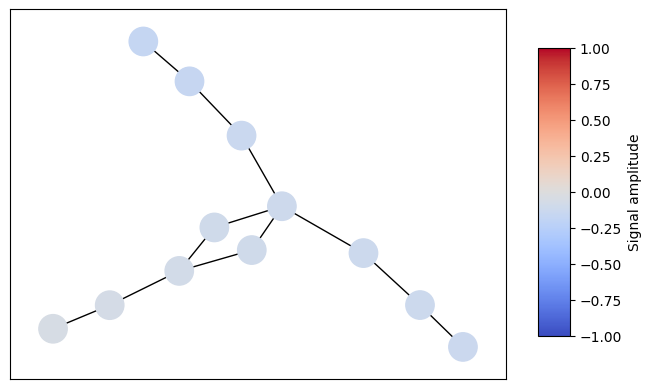

Mean and std:  (-0.11085137895911588, 0.03342578764480738)
Laplacian quadratic form:  0.002573109300956516


In [4]:
# Input parameters
num_nodes = 12
num_edges = 12
value_range = (-1, 1)
diffusion_timesteps = [0, 2, 5, 10, 100]

# Create the graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])

# Perform diffusion and plot the graph at each timestep
G_list = [G0]
for t in diffusion_timesteps:
    G = diffusion(G0,  diffusion_steps = t)
    G_list.append(G)
    plot_graph(G, labels=False, value_range=value_range)
    print("Mean and std: ", graph_stats(G))
    print("Laplacian quadratic form: ", signal_smoothness_on_graph(G))


In [5]:
#Sample the signal from the graph
samples = sample_signal_from_graph(G0, num_samples = 20, sampling_noise_std = 0.2)
print("Samples shape: ", samples.shape)
print("Samples: ", samples)

Samples shape:  (20, 12)
Samples:  [[ 0.20274647  0.98520462 -0.41012245  0.49421885 -0.88365287  0.73036942
   0.81885714  0.8365769   0.64348012 -0.8900886  -0.08664394  1.02801075]
 [ 0.26203646  0.72086389 -0.73551924  0.69963558 -1.04522808  0.64190272
   0.16099095  0.68686376  0.63636936 -0.88013691  0.10875283  1.2585069 ]
 [ 0.48958273  0.97136612 -0.47064334  0.79528315 -0.737718    0.70120905
   0.59182615  1.08736462  0.85949907 -1.02763136 -0.24187219  1.10058433]
 [ 0.55988819  0.78085383 -0.36471053  0.58165027 -0.88734993  0.65307194
   0.28336261  0.96702877  0.56488414 -1.00353033 -0.38856893  1.2017905 ]
 [ 0.67628408  0.6180581  -0.89062852  0.49221204 -1.42443193  0.6753319
   0.62929942  1.05852605  0.29287119 -0.71523716 -0.38399875  1.27012316]
 [ 0.35534434  0.97801533 -0.43566255  0.53874319 -1.10074456  0.56453209
   0.32462613  0.78141544  0.80724628 -1.07308149 -0.03332244  1.05148772]
 [ 0.47304579  0.74961203 -0.66766837  0.49649775 -1.0014444   0.6200891

### Test of the initial solver and proposed graphs

In [6]:
#Initialize graph

solvers.options['show_progress'] = True
syn = synthetic_data_gen(10)
num_nodes = syn.num_vertices

np.random.seed(3)
graph_signals_er, graph_signals_ba, graph_signals_rnd = syn.get_graph_signals()


     pcost       dcost       gap    pres   dres
 0:  4.2592e+00 -1.4865e+00  7e+01  8e+00  5e+00
 1:  4.8787e+00 -2.2715e-01  5e+00  1e-15  1e-15
 2:  4.6799e+00  3.6163e+00  1e+00  2e-16  5e-16
 3:  4.3615e+00  4.1438e+00  2e-01  2e-16  4e-16
 4:  4.2641e+00  4.2485e+00  2e-02  2e-16  2e-16
 5:  4.2542e+00  4.2535e+00  7e-04  3e-16  2e-16
 6:  4.2538e+00  4.2538e+00  4e-05  3e-16  2e-16
 7:  4.2538e+00  4.2538e+00  3e-06  3e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2402e+00 -1.5105e+00  7e+01  8e+00  5e+00
 1:  4.8601e+00 -2.4973e-01  5e+00  1e-15  1e-15
 2:  4.6610e+00  3.5936e+00  1e+00  2e-16  6e-16
 3:  4.3414e+00  4.1230e+00  2e-01  2e-16  4e-16
 4:  4.2435e+00  4.2279e+00  2e-02  2e-16  2e-16
 5:  4.2335e+00  4.2328e+00  7e-04  2e-16  2e-16
 6:  4.2331e+00  4.2331e+00  4e-05  3e-16  2e-16
 7:  4.2331e+00  4.2331e+00  4e-06  4e-16  3e-16
Optimal solution found.


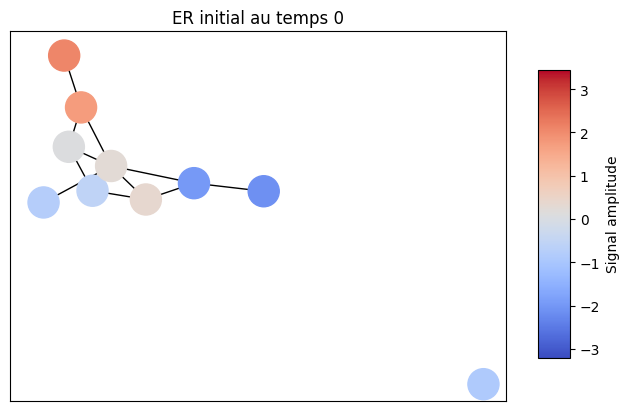

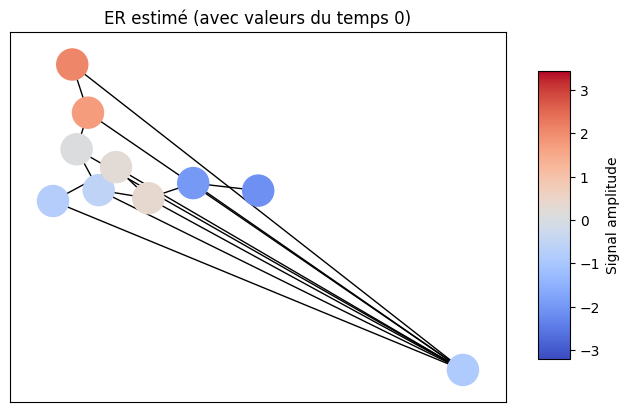

In [7]:
L_er, Y_er = gl_sig_model(graph_signals_er, 1000, syn.alpha_er, syn.beta_er)

L_er_gt = nx.laplacian_matrix(syn.er_graph)

gt_graph = syn.er_graph
est_graph = create_graph_from_laplacian(L_er)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  2.2118e+00 -3.1900e+00  1e+02  8e+00  5e+00
 1:  4.4480e+00 -1.7911e+00  6e+00  1e-15  9e-16
 2:  4.0114e+00  2.2076e+00  2e+00  8e-16  7e-16
 3:  3.1694e+00  2.6941e+00  5e-01  3e-16  3e-16
 4:  2.9302e+00  2.9049e+00  3e-02  4e-16  3e-16
 5:  2.9105e+00  2.9099e+00  6e-04  4e-16  3e-16
 6:  2.9100e+00  2.9100e+00  2e-05  2e-16  3e-16
 7:  2.9100e+00  2.9100e+00  3e-07  3e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1950e+00 -3.2074e+00  1e+02  8e+00  5e+00
 1:  4.4356e+00 -1.8073e+00  6e+00  2e-15  1e-15
 2:  3.9971e+00  2.1911e+00  2e+00  4e-16  7e-16
 3:  3.1521e+00  2.6771e+00  5e-01  4e-16  3e-16
 4:  2.9128e+00  2.8876e+00  3e-02  2e-16  4e-16
 5:  2.8932e+00  2.8926e+00  6e-04  3e-16  3e-16
 6:  2.8927e+00  2.8927e+00  2e-05  4e-16  3e-16
 7:  2.8927e+00  2.8927e+00  2e-07  3e-16  3e-16
Optimal solution found.


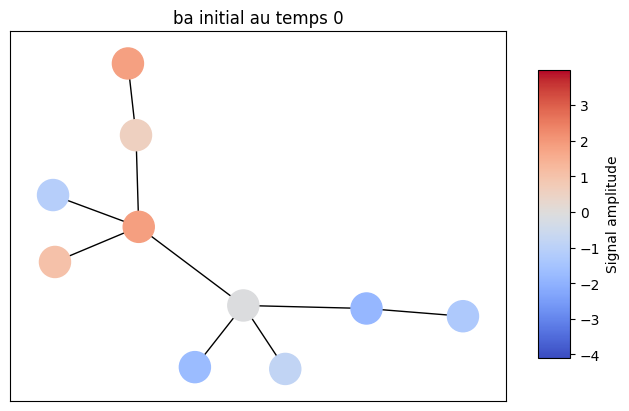

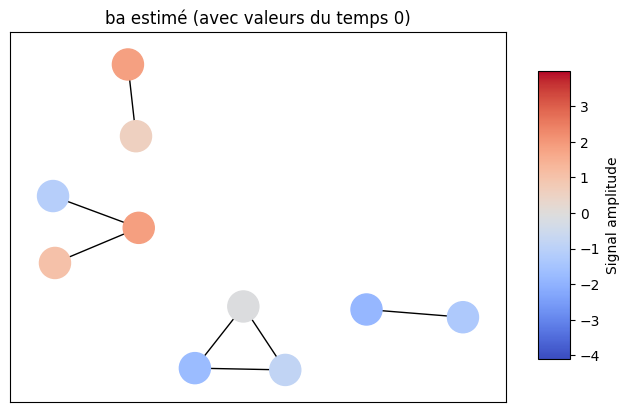

In [8]:
L_ba, Y_ba = gl_sig_model(graph_signals_ba, 1000, syn.alpha_ba, syn.beta_ba)

L_ba_gt = nx.laplacian_matrix(syn.ba_graph)

gt_graph = syn.ba_graph
est_graph = create_graph_from_laplacian(L_ba)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  1.8548e+01  1.3214e+01  6e+01  7e+00  2e+00
 1:  1.8708e+01  1.4376e+01  6e+00  3e-01  7e-02
 2:  1.8733e+01  1.8275e+01  5e-01  8e-03  2e-03
 3:  1.8667e+01  1.8635e+01  3e-02  2e-04  6e-05
 4:  1.8656e+01  1.8654e+01  2e-03  3e-06  8e-07
 5:  1.8655e+01  1.8655e+01  9e-05  3e-08  8e-09
 6:  1.8655e+01  1.8655e+01  8e-06  3e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8334e+01  1.2997e+01  6e+01  7e+00  2e+00
 1:  1.8490e+01  1.4157e+01  6e+00  2e-01  7e-02
 2:  1.8509e+01  1.8056e+01  5e-01  9e-03  2e-03
 3:  1.8446e+01  1.8414e+01  3e-02  3e-04  7e-05
 4:  1.8435e+01  1.8433e+01  2e-03  3e-06  9e-07
 5:  1.8434e+01  1.8434e+01  1e-04  3e-08  8e-09
 6:  1.8434e+01  1.8434e+01  8e-06  3e-10  9e-11
Optimal solution found.


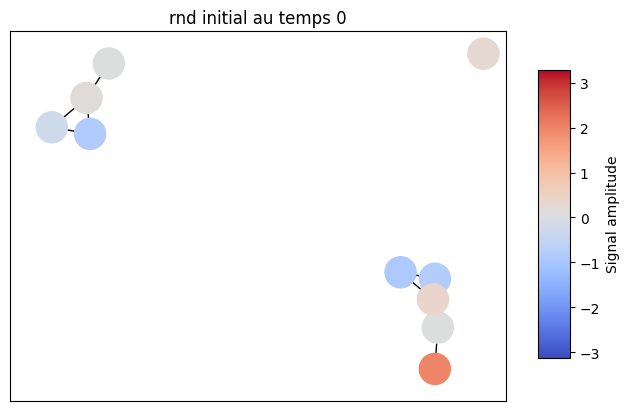

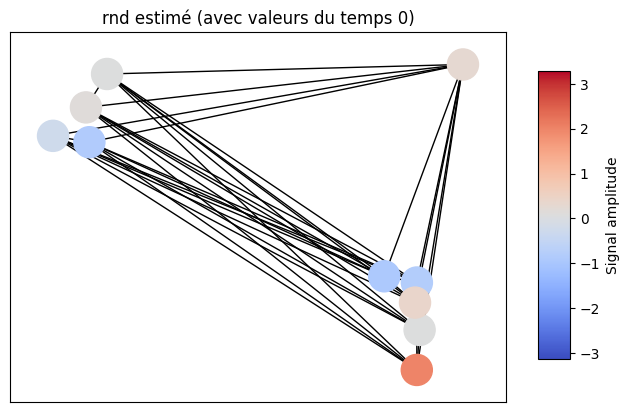

In [9]:
L_rnd, Y_rnd = gl_sig_model(graph_signals_rnd, 1000, syn.alpha_rnd, syn.beta_rnd)

L_rnd_gt = nx.laplacian_matrix(syn.random_graph)

gt_graph = syn.random_graph
est_graph = create_graph_from_laplacian(L_rnd)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd estimé (avec valeurs du temps 0)")

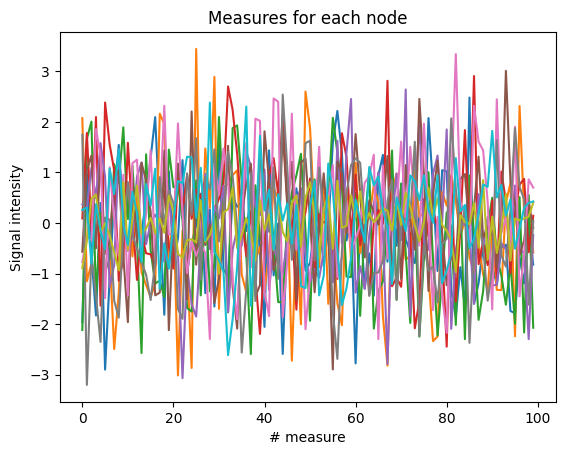

In [10]:
# Plot the 100 measures on each node
plt.figure()
for node in range(graph_signals_er.shape[1]) :
    plt.plot(graph_signals_er[:, node], label = f"Signal du noeud {node}")
# plt.legend()
plt.title("Measures for each node")
plt.xlabel("# measure")
plt.ylabel("Signal intensity")
plt.show()

### Test solver with our graphs

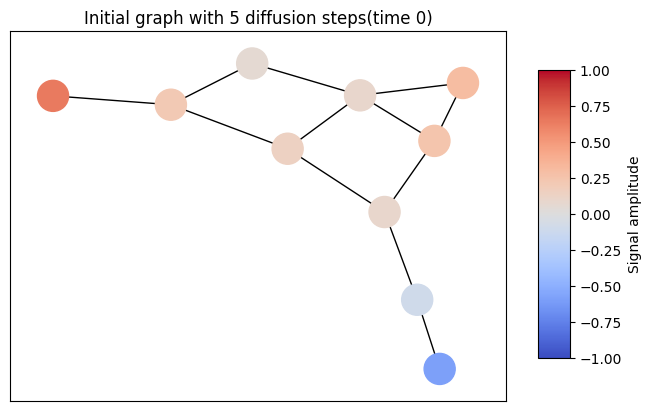

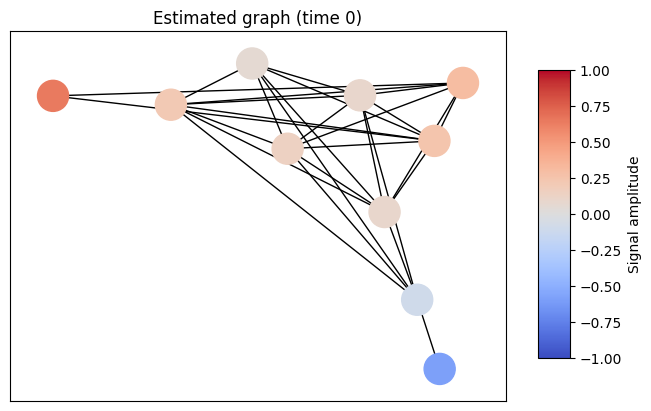

In [11]:
# Graph generation
# Input parameters
num_nodes = 10
num_edges = 12
value_range = (-1, 1)
diffusion_time = 5
# Create the initial graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
# Perform diffusion
G = diffusion(G0,  diffusion_steps = diffusion_time)

# Graph signal generation
# Signal parameters
num_samples = 20
noise_std = 0.2
# Generation
graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

# Solver
# Solver parameters
max_iter = 1000
alpha = 1e-3
beta = 2e-3
solvers.options['show_progress'] = False
np.random.seed(3)
# Solving
L_est, Y_est = gl_sig_model(graph_signal, max_iter, alpha, beta)

# Generate graph from Laplacian
G_est = create_graph_from_laplacian(L_est, 1)
for node in G_est.nodes():
    G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
    G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
for edge in G_est.edges():
    G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph with {diffusion_time} diffusion steps(time 0)")
plot_graph(G_est, value_range=value_range, labels=False, title="Estimated graph (time 0)")

### Tuning hyperparameters

Principe : On choisit alpha, beta et un t_diff. On génére n_stat graphes initiaux, on les fait diffuser et on crée un sample pour chacune des diffusions.
On utilise le solver et on fait la moyenne sur les n_stat graphe des distances.

In [12]:
# REMARQUE : Cette cellule prend un peu moins de 5min pour n_stat de 10 chez moi

n_stat = 10
g_init = []
sample_init = []
for _ in range(n_stat) :
    # Graph generation
    # Input parameters
    num_nodes = 10
    num_edges = 12
    value_range = (-1, 1)
    diffusion_time = 5
    # Create the initial graph
    G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
    # Perform diffusion
    G = diffusion(G0,  diffusion_steps = diffusion_time)

    # Graph signal generation
    # Signal parameters
    num_samples = 20
    noise_std = 0.2
    # Generation
    graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

    g_init.append(G)
    sample_init.append(graph_signal)

#logspace
alphas = np.logspace(-6, -3, 30)
betas = np.logspace(-5, -2, 30)
# alphas = np.linspace(1e-6, 1e-3, 30)
# betas = np.linspace(0.5e-4, 1e-2, 30)
G_est_ab = [[0] * len(betas) for _ in range(len(alphas))]
distances = np.zeros((len(alphas), len(betas)))
distance_min = 100
param_min = []
for i, alpha in enumerate(alphas) :
    for j, beta in enumerate(betas) :
        # Solver parameters
        max_iter = 1000
        solvers.options['show_progress'] = False
        np.random.seed(3)
        dist_k = []
        for k in range(n_stat) :
            # Solving
            L_est, Y_est = gl_sig_model(sample_init[k], max_iter, alpha, beta)

            # Generate graph from Laplacian
            G_est = create_graph_from_laplacian(L_est, 1)
            # for node in G_est.nodes():
            #     G_est.nodes[node]['value'] = g_init[k].nodes[node]['value'] #add signal
            #     G_est.nodes[node]['pos'] = g_init[k].nodes[node]['pos'] #keep same position as initial
            # for edge in G_est.edges():
            #     G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)
            # G_est_ab[i][j] = G_est
            dist_k.append(Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(g_init[k]), Graph(G_est)))
        
        distances[i, j] = sum(dist_k) / len(dist_k)
        if distances[i,j] < distance_min :
            distance_min = distances[i,j]
            param_min = [(i, alpha), (j, beta)]


[(23, 0.0002395026619987486), (14, 0.0002807216203941176)]


<Figure size 2000x1000 with 0 Axes>

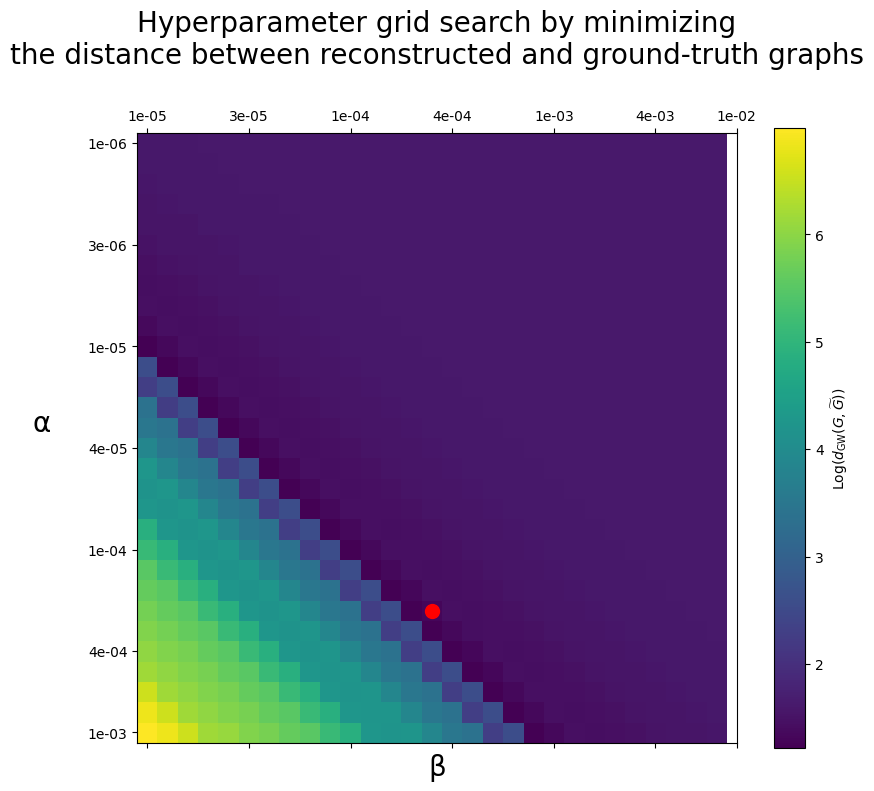

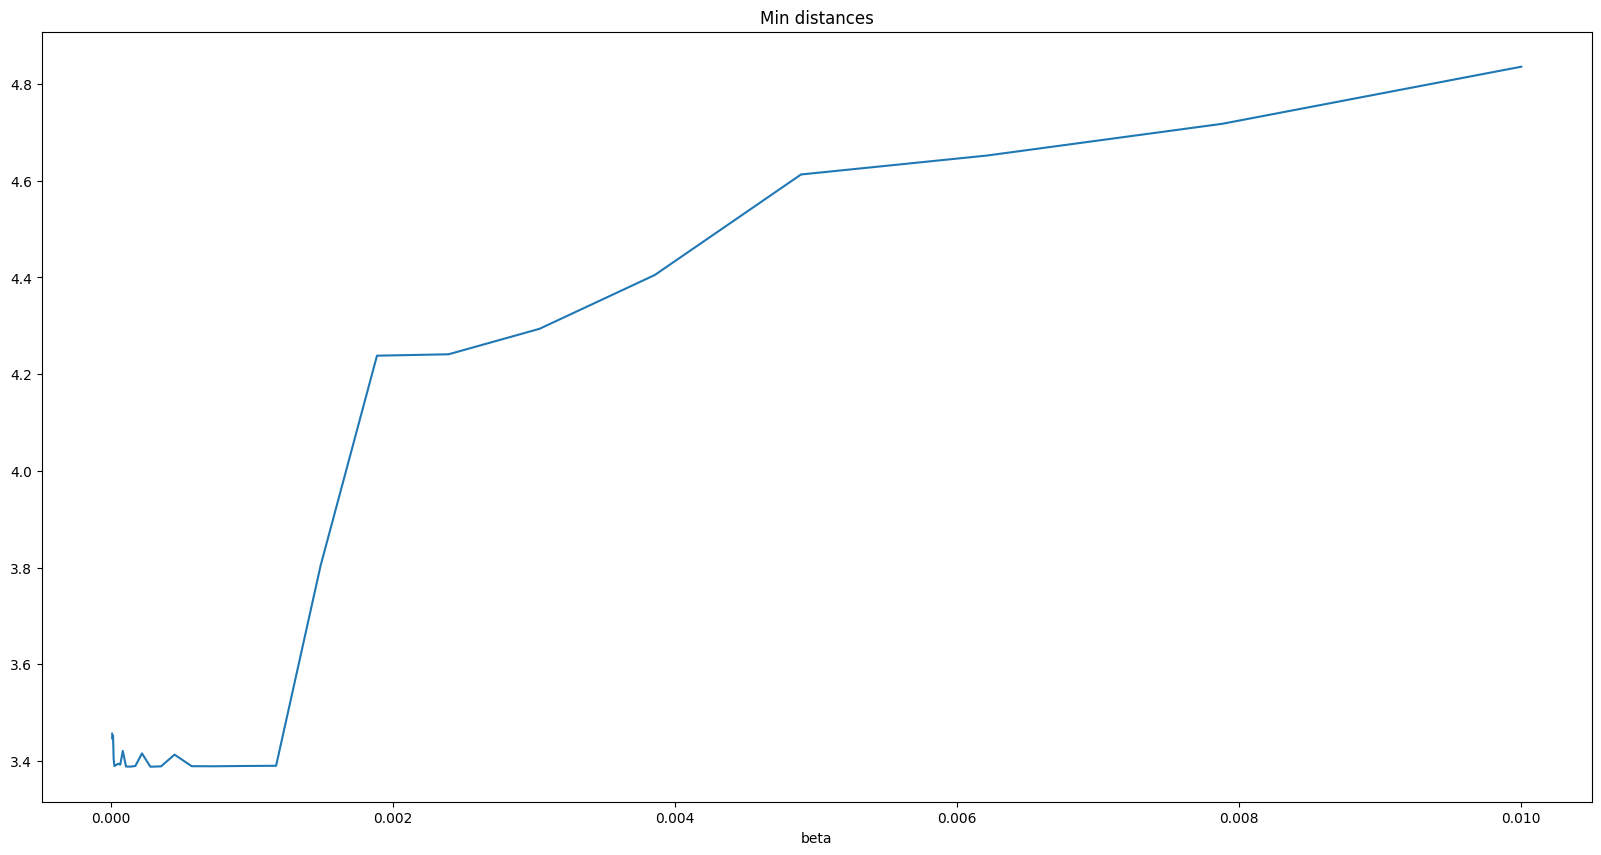

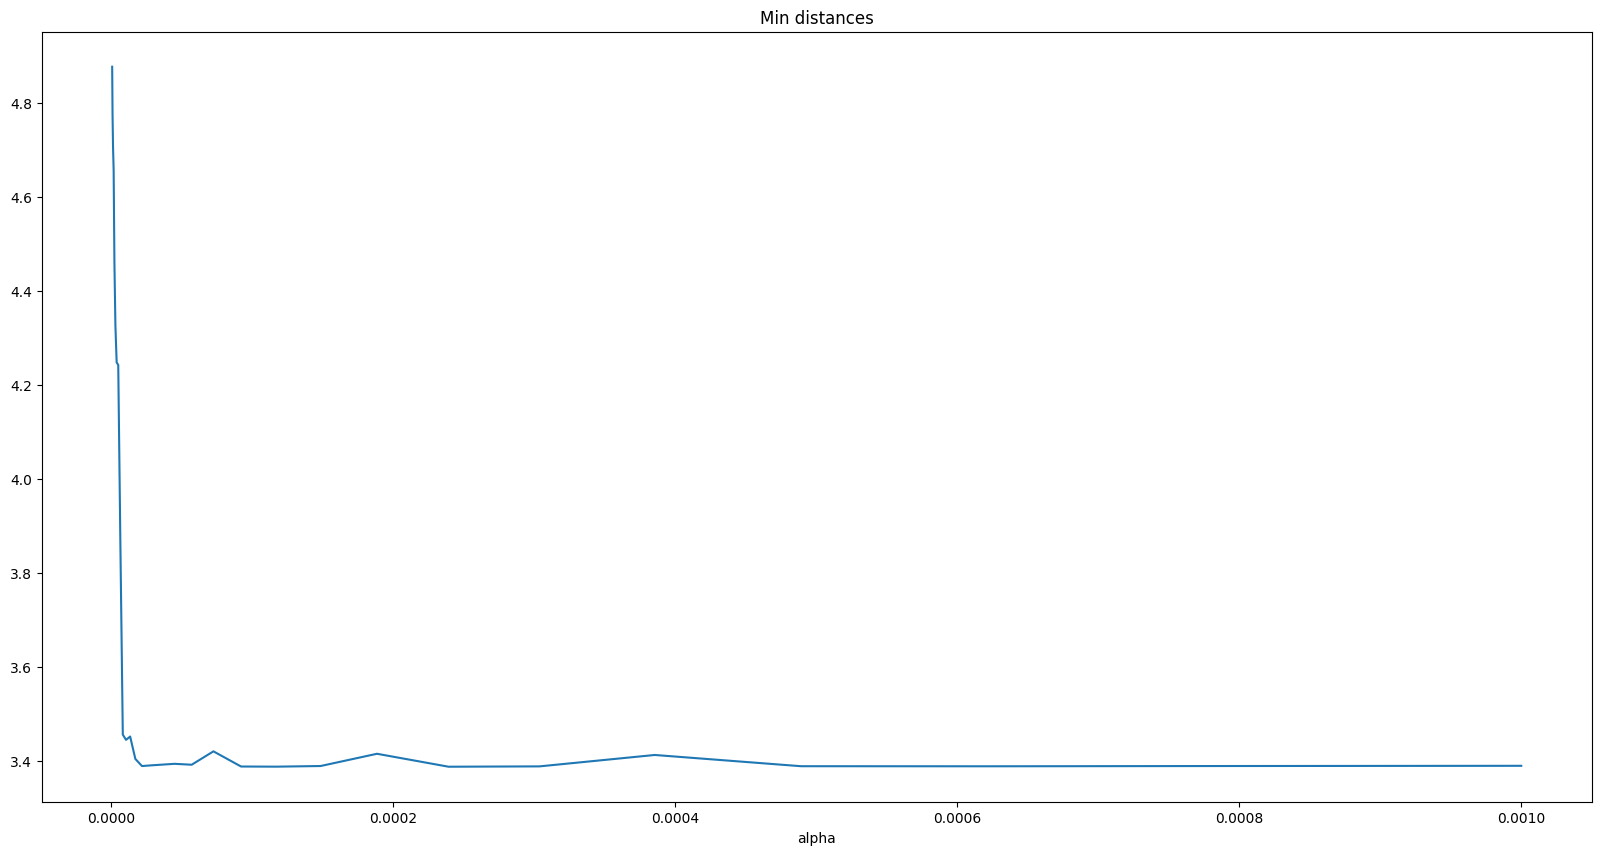

array([[   4.87761819,    4.93132681,    4.93851253,    4.95799372,
           4.9720031 ,    5.00350155,    4.99356445,    4.9943613 ,
           4.99437314,    4.98977148,    4.98702971,    4.9870296 ,
           4.98736559,    4.9880107 ,    4.98827667,    4.98835121,
           4.98844099,    4.98867546,    4.98870455,    4.98866364,
           4.98877046,    4.98875934,    4.98877381,    4.98878692,
           4.98883053,    4.9888101 ,    4.98882529,    4.98884712,
           4.98885789,    4.98887005],
       [   4.77362606,    4.88258111,    4.93071777,    4.93748688,
           4.9598997 ,    4.97216517,    5.00394628,    4.99300096,
           4.99070199,    4.99459828,    4.98967999,    4.98705151,
           4.98692597,    4.98769134,    4.98774188,    4.98786745,
           4.98852471,    4.98850142,    4.98858184,    4.98858478,
           4.98874838,    4.98875046,    4.98875859,    4.98881403,
           4.98883484,    4.98884578,    4.98885376,    4.9888624 ,
         

In [13]:
print(param_min)
# Make the plot larger
plt.rcParams["figure.figsize"] = (20, 10)

plt.figure()
plt.matshow(np.log(distances[:, 1:]))

plt.plot(param_min[1][0], param_min[0][0], 'ro', markersize=10)

plt.xlabel('β', fontsize=20)
plt.ylabel('α ', fontsize=20, rotation=0, labelpad=30)

plt.xticks([0, 5, 10, 15, 20, 25, 29], [f'{betas[i]:.0e}' for i in [0, 5, 10, 15, 20, 25, 29]])
plt.yticks([0, 5, 10, 15, 20, 25, 29], [f'{alphas[i]:.0e}' for i in [0, 5, 10, 15, 20, 25, 29]])

plt.title('Hyperparameter grid search by minimizing\nthe distance between reconstructed and ground-truth graphs', y=1.1, fontsize=20)
plt.colorbar(label='Log($d_{\mathrm{GW}}(G, \widetilde{G})$)', shrink=0.8)

plt.show()


plt.figure()
plt.plot(betas, np.min(distances, 0))
plt.title("Min distances")
plt.xlabel("beta")
plt.show()
plt.figure()
plt.plot(alphas, np.min(distances, 1))
plt.title("Min distances")
plt.xlabel("alpha")
plt.show()
distances

Best values are depending on the initial graph, but the variations are globally always the same.
The best value intervals in term of *Fused_Gromov_Wasserstein_distance(alpha=0.5,features_metric='dirac',method='shortest_path')* seem to be :
$$\alpha^* \in [6e-4, 1e-3]$$
$$\beta^* \in [1e-3, 2e-3]$$


### Experiment 1 : Distance wrt smoothness

In [46]:
max_iter = 1000
alpha = 0.0004143793103448276# 1e-3 #5e-3
beta = 0.00039310344827586213#2e-3
solvers.options['show_progress'] = False
np.random.seed(3)

nb_graphs = 100  # Number of graphs to generate and test on
num_nodes = 8  # Number of nodes in each graph
num_edges = 8  # Number of edges in each graph
node_value_range = [-1, 1]  # Range of values that each node can take
edge_weight_range = [1, 1]  # Range of weights that each edge can take

diffusion_steps = np.logspace(0, 1.5, 25)  # Number of diffusion steps to test on

# Build the ground truth and reconstructed graphs for each diffusion step
gt_graphs = [[] for _ in range(len(diffusion_steps))]
reconstructed_graphs = [[] for _ in range(len(diffusion_steps))] # for eah diffusion time, the estimated graph for different initial graphs
for i in range(nb_graphs):
    # Create a graph
    G0 = create_graph(num_nodes, num_edges, node_value_range, edge_weight_range = edge_weight_range)

    # Perform diffusion and plot the graph at each timestep
    for j, t in enumerate(diffusion_steps):
        G = diffusion(G0,  diffusion_steps = t)
        gt_graphs[j].append(G)

        #Sample the signal from the graph
        samples = sample_signal_from_graph(G, num_samples = 20, sampling_noise_std = 0.2)
        
        #Reconstruct the graph from the samples
        L_est, Y_est = gl_sig_model(samples, max_iter, alpha, beta)

        # Generate graph from Laplacian
        G_est = create_graph_from_laplacian(L_est, 1)
        for node in G_est.nodes():
            G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
            G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
        for edge in G_est.edges():
            G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

        reconstructed_graphs[j].append(G_est)


In [48]:
#Compute the FGW distances between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance
distances_fgw = np.zeros((len(diffusion_steps), nb_graphs))

for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        distances_fgw[i, j] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[i][j]))


# Compute the smoothness of the signal on each graph
smoothnesses = np.zeros((len(diffusion_steps), nb_graphs))
for i, graphs in enumerate(gt_graphs):
    for j, graph in enumerate(graphs):
        smoothnesses[i, j] = signal_smoothness_on_graph(graph)



Text(0.5, 1.0, 'Smoothness Q(L,x) of a signal on its underlying graph\nw.r.t. the diffusion time')

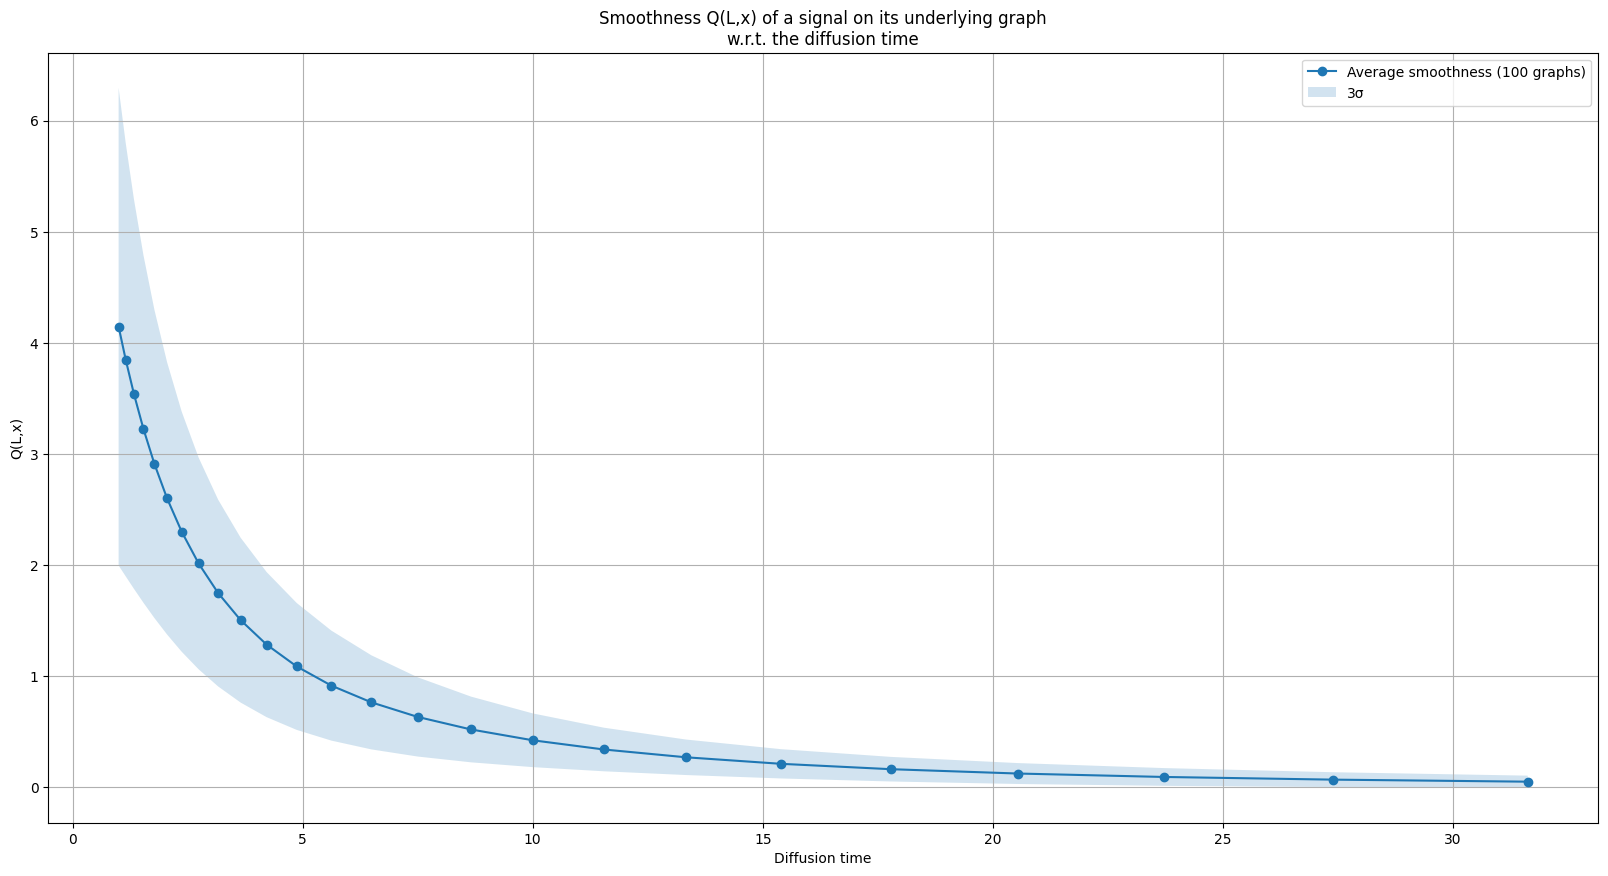

In [49]:
#Plot the average and std for the quadratic form of the Laplacian matrix of each graph per diffusion step as a continuous line and a shaded area respectively
plt.plot(diffusion_steps, np.mean(smoothnesses, axis=1), marker='o', label=f'Average smoothness ({nb_graphs} graphs)')
plt.fill_between(diffusion_steps, np.mean(smoothnesses, axis=1) - 1.5 * np.std(smoothnesses, axis=1), np.mean(smoothnesses, axis=1) + 1.5 * np.std(smoothnesses, axis=1), alpha=0.2, label='3σ')
#Add a legend to explain the shaded area
plt.legend()
plt.xlabel("Diffusion time")
plt.ylabel("Q(L,x)")
#Add a grid to the plot
plt.grid()
plt.title("Smoothness Q(L,x) of a signal on its underlying graph\nw.r.t. the diffusion time")



Text(0.5, 1.0, 'Smoothness Q(L,x) of a signal on its underlying graph\nw.r.t. the diffusion time')

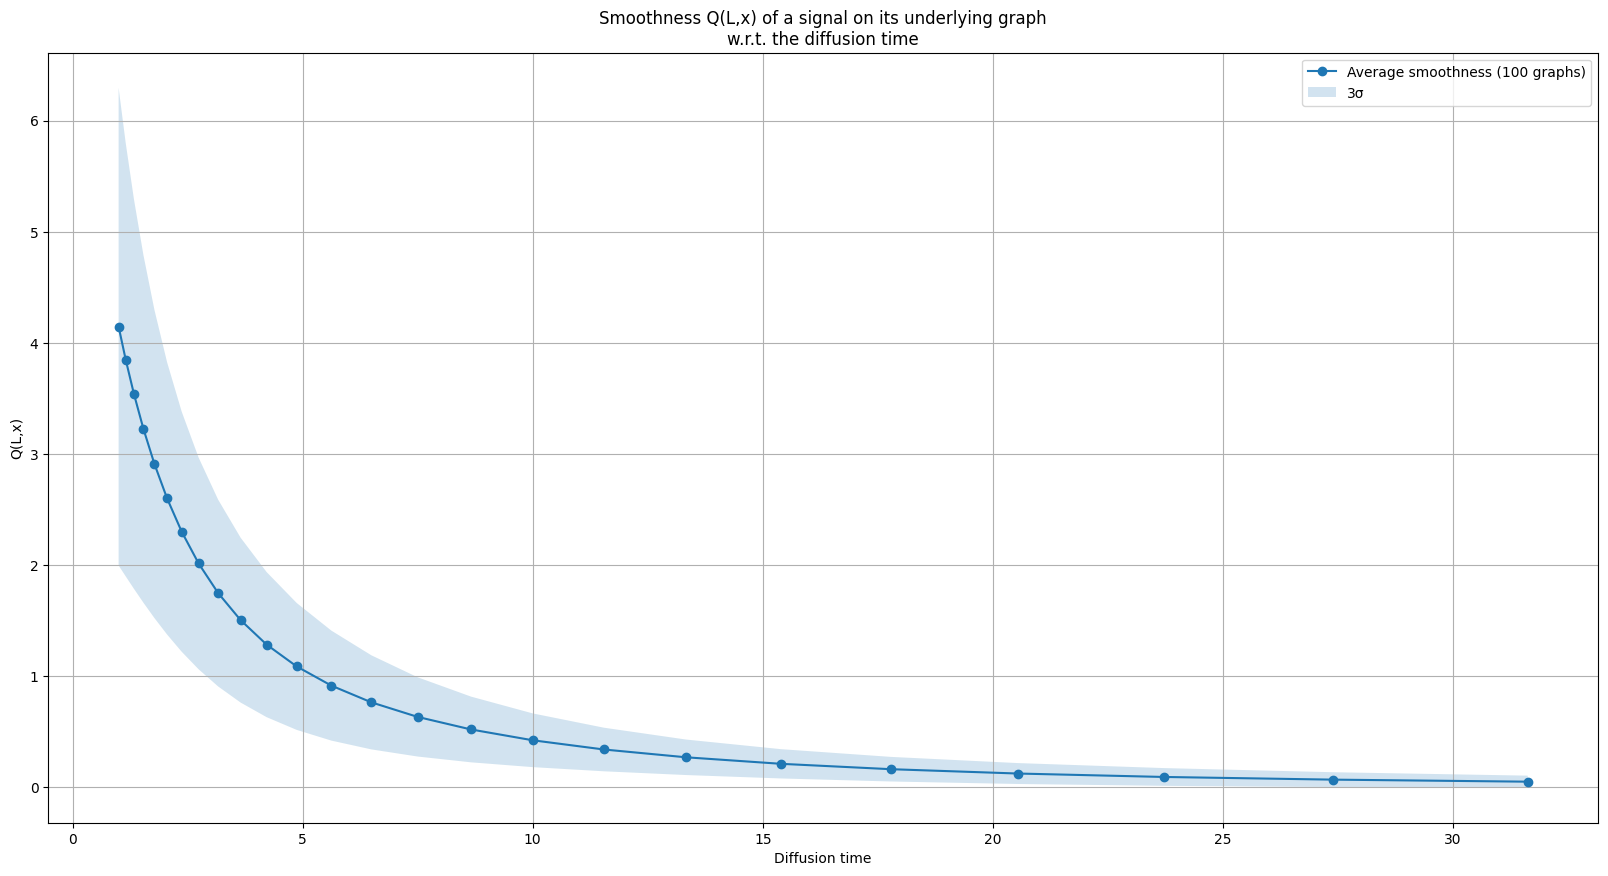

In [50]:
#Plot the average and std for the quadratic form of the Laplacian matrix of each graph per diffusion step as a continuous line and a shaded area respectively
plt.plot(diffusion_steps, np.mean(smoothnesses, axis=1), marker='o', label=f'Average smoothness ({nb_graphs} graphs)')
plt.fill_between(diffusion_steps, np.mean(smoothnesses, axis=1) - 1.5 * np.std(smoothnesses, axis=1), np.mean(smoothnesses, axis=1) + 1.5 * np.std(smoothnesses, axis=1), alpha=0.2, label='3σ')
#Add a legend to explain the shaded area
plt.legend()
plt.xlabel("Diffusion time")
plt.ylabel("Q(L,x)")
#Add a grid to the plot
plt.grid()
plt.title("Smoothness Q(L,x) of a signal on its underlying graph\nw.r.t. the diffusion time")



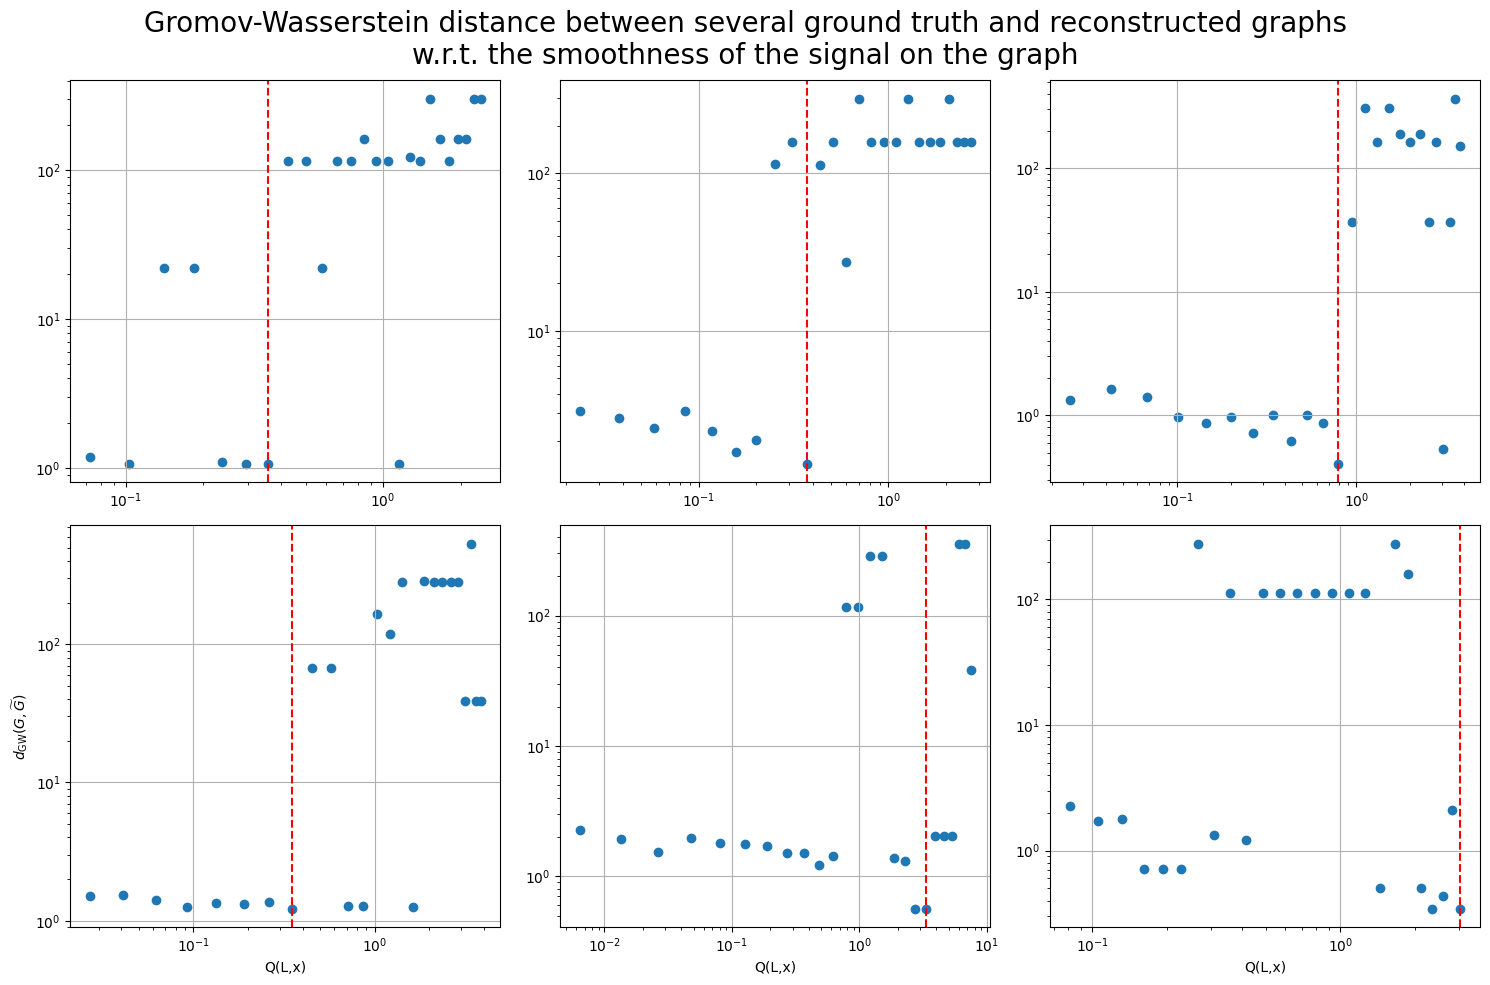

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the size and dimensions of the grid as needed
graph_indices = [1, 3, 4, 5, 9, 8]  # Adjusted to start from 1 instead of 0

for i, ax in zip(graph_indices, axs.flatten()):
    ax.scatter(smoothnesses[:, i - 1], distances_fgw[:, i - 1], label=f"Graph {i}")
    vertical_line_x = smoothnesses[np.argmin(distances_fgw[:, i - 1]), i - 1]
    ax.axvline(x=vertical_line_x, color='r', linestyle='--')
    
    # Log scale for the y axis
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # Add a grid
    ax.grid()
    # Set the y axis label only for the very left plots
    if i in [5, 9, 8]:
        ax.set_xlabel("Q(L,x)")
    
    # Set the x axis label only for the very bottom plots
    if i in [5, 6]:
        ax.set_ylabel("$d_{\mathrm{GW}}(G, \widetilde{G})$")

# Adjust layout for the title
plt.subplots_adjust(top=0.85)
plt.suptitle("Gromov-Wasserstein distance between several ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph", ha='center', fontsize=20)

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

In [23]:
#Take the first graph and concatenate all the samples 

In [24]:
#Compute the GED distances between the ground truth and reconstructed graphs 
distances_ged = np.zeros((len(diffusion_steps), nb_graphs))

for i in tqdm(range(len(diffusion_steps))):
    for j in tqdm(range(nb_graphs)):
        #Compute the graph edit distance by matching the nodes based on their position
        distances_ged[i, j] = nx.graph_edit_distance(gt_graphs[i][j], reconstructed_graphs[i][j])


  0%|          | 0/25 [02:25<?, ?it/s]


KeyboardInterrupt: 

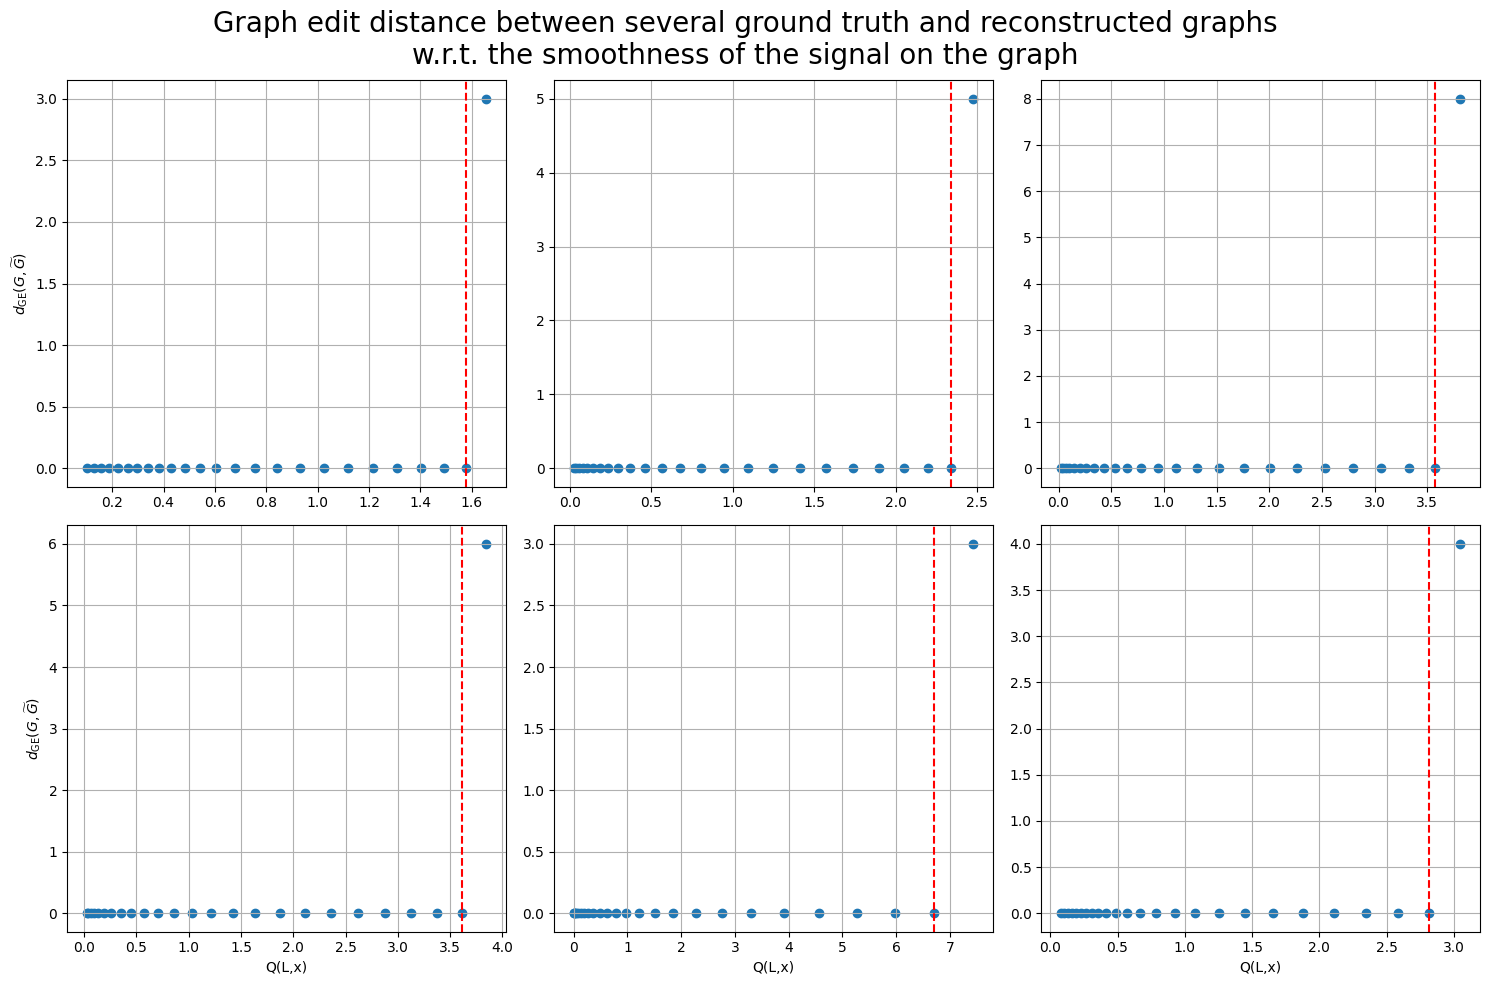

In [52]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the size and dimensions of the grid as needed
graph_indices = [6, 2, 4, 5, 9, 8]  # Adjusted to start from 1 instead of 0

for i, ax in zip(graph_indices, axs.flatten()):
    ax.scatter(smoothnesses[:, i - 1], distances_ged[:, i - 1], label=f"Graph {i}")
    vertical_line_x = smoothnesses[np.argmin(distances_ged[:, i - 1]), i - 1]
    ax.axvline(x=vertical_line_x, color='r', linestyle='--')
    
    # Log scale for the y axis
    # ax.set_yscale('log')
    # ax.set_xscale('log')
    
    # Add a grid
    ax.grid()
    # Set the y axis label only for the very left plots
    if i in [5, 9, 8]:
        ax.set_xlabel("Q(L,x)")
    
    # Set the x axis label only for the very bottom plots
    if i in [5, 6]:
        ax.set_ylabel("$d_{\mathrm{GE}}(G, \widetilde{G})$")

# Adjust layout for the title
plt.subplots_adjust(top=0.85)
plt.suptitle("Graph edit distance between several ground truth and reconstructed graphs\nw.r.t. the smoothness of the signal on the graph", ha='center', fontsize=20)

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

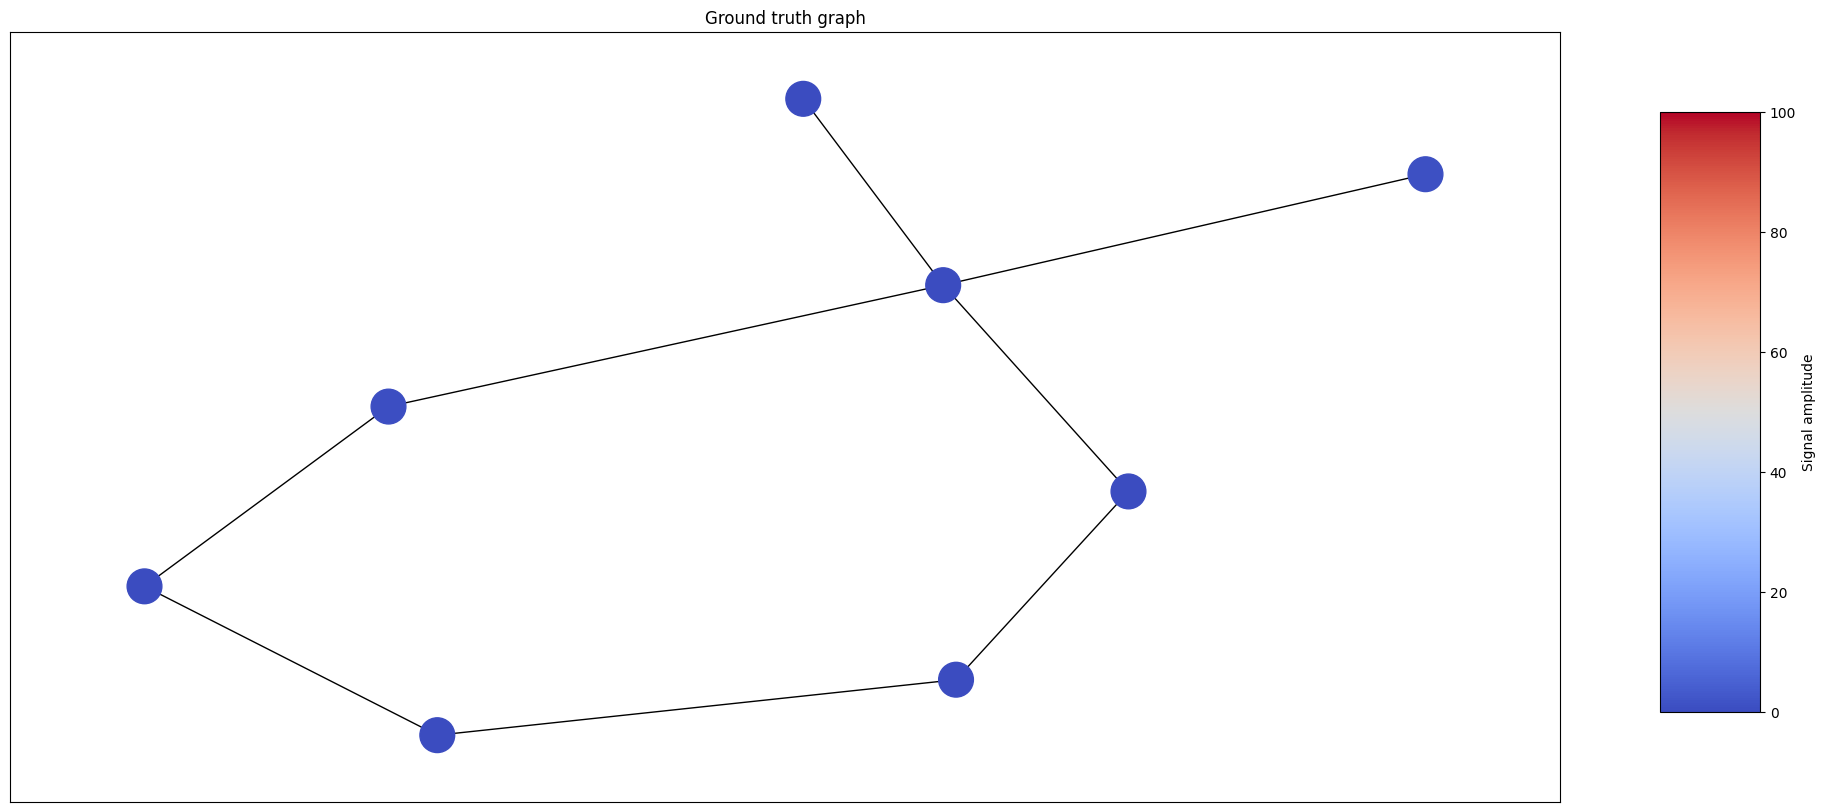

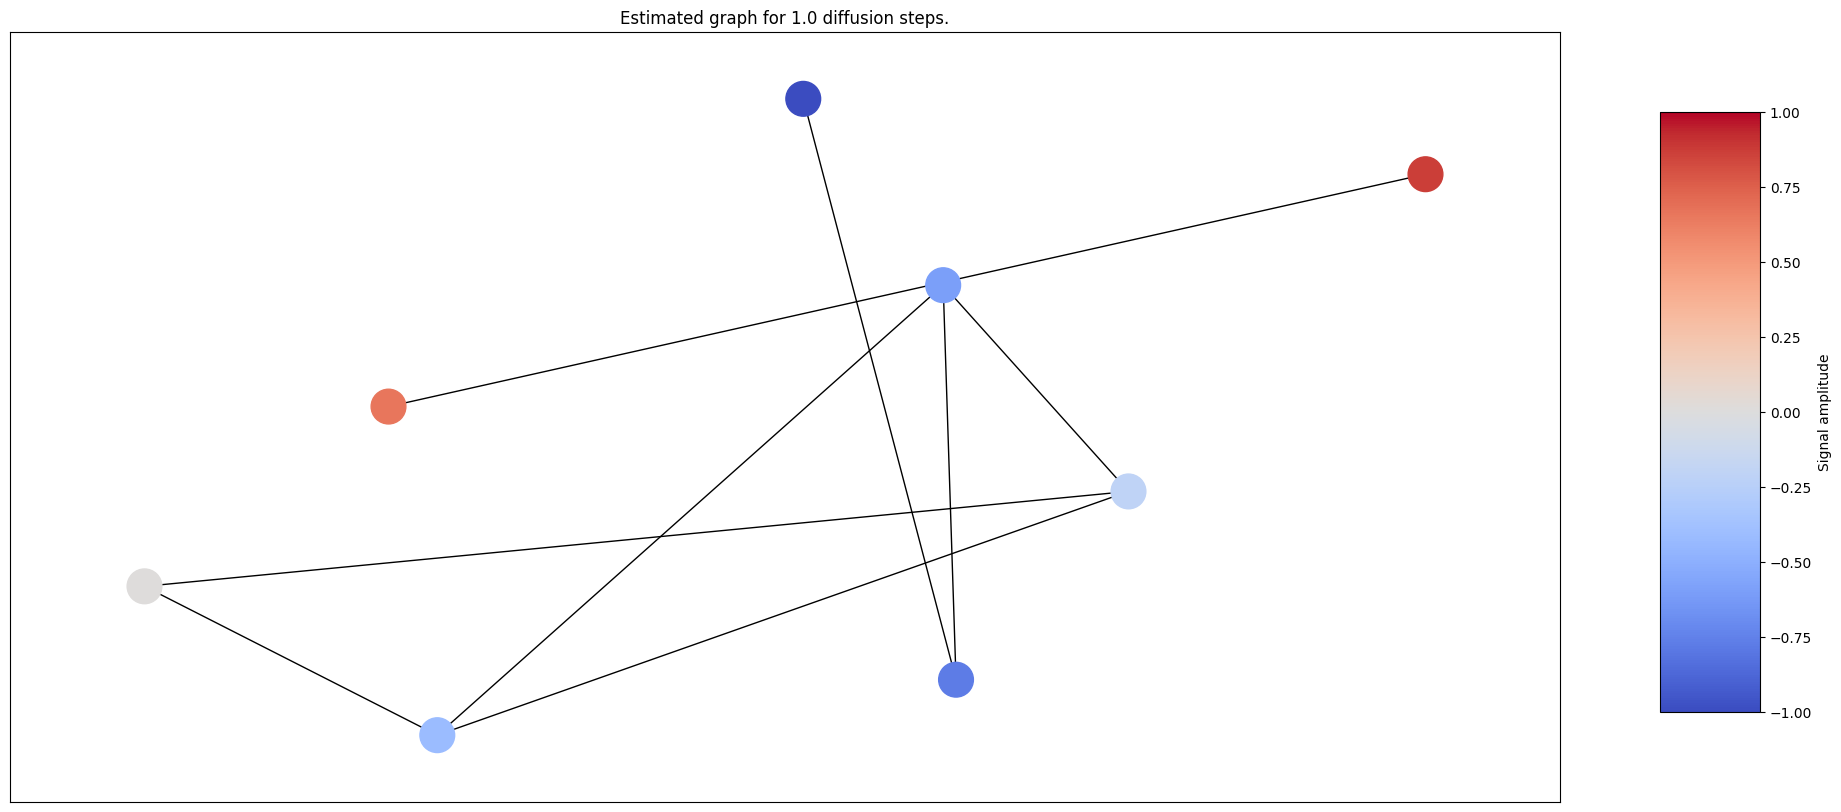

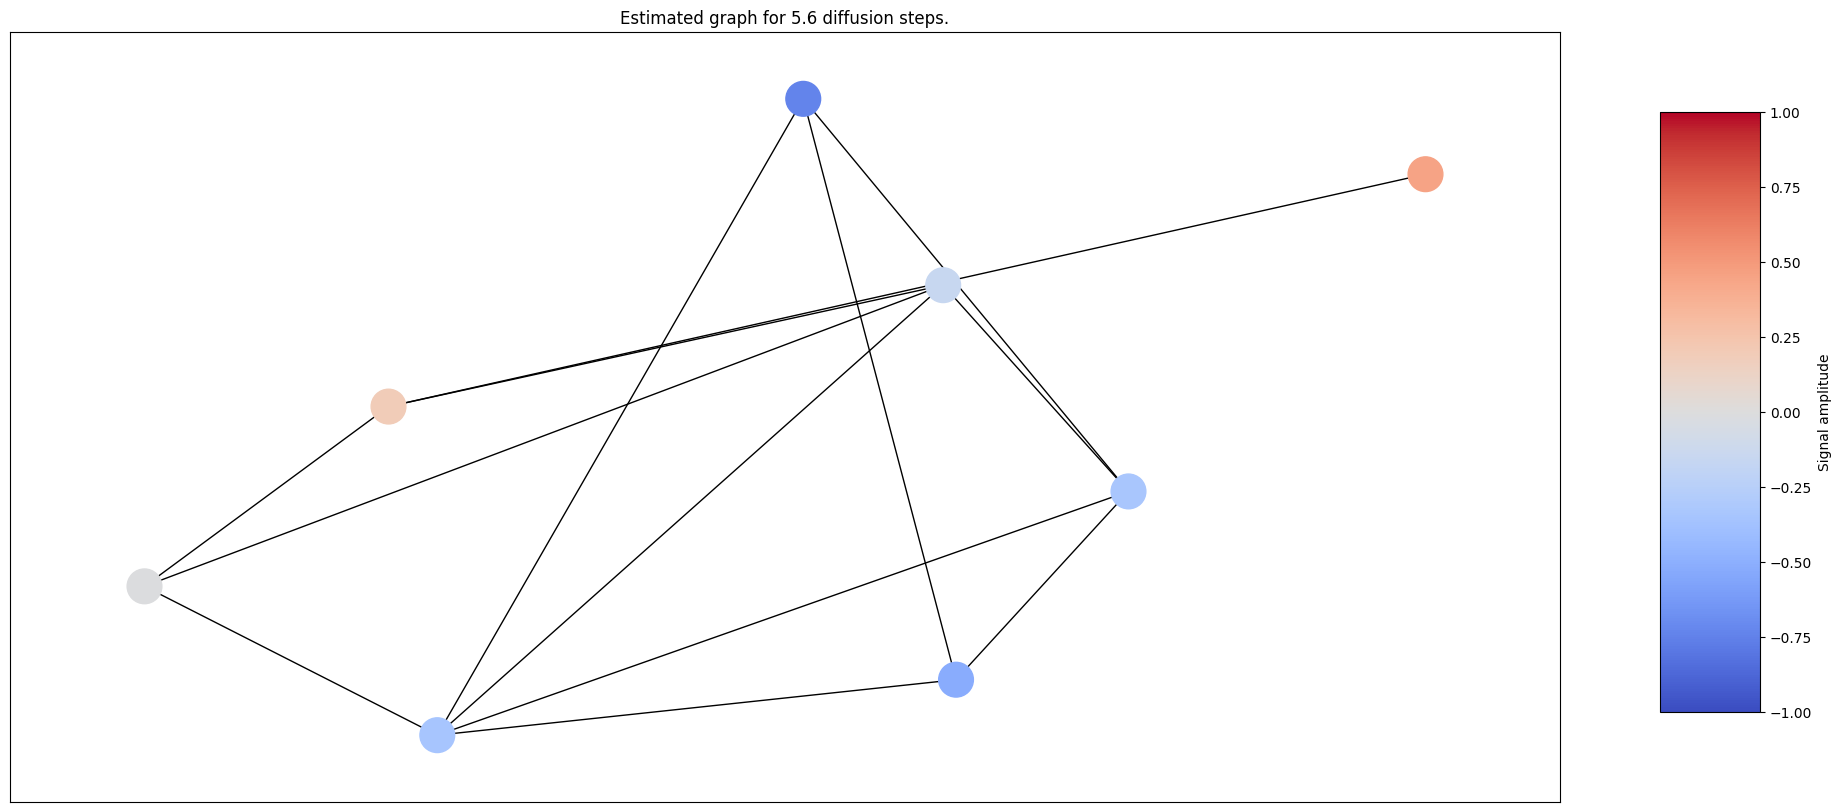

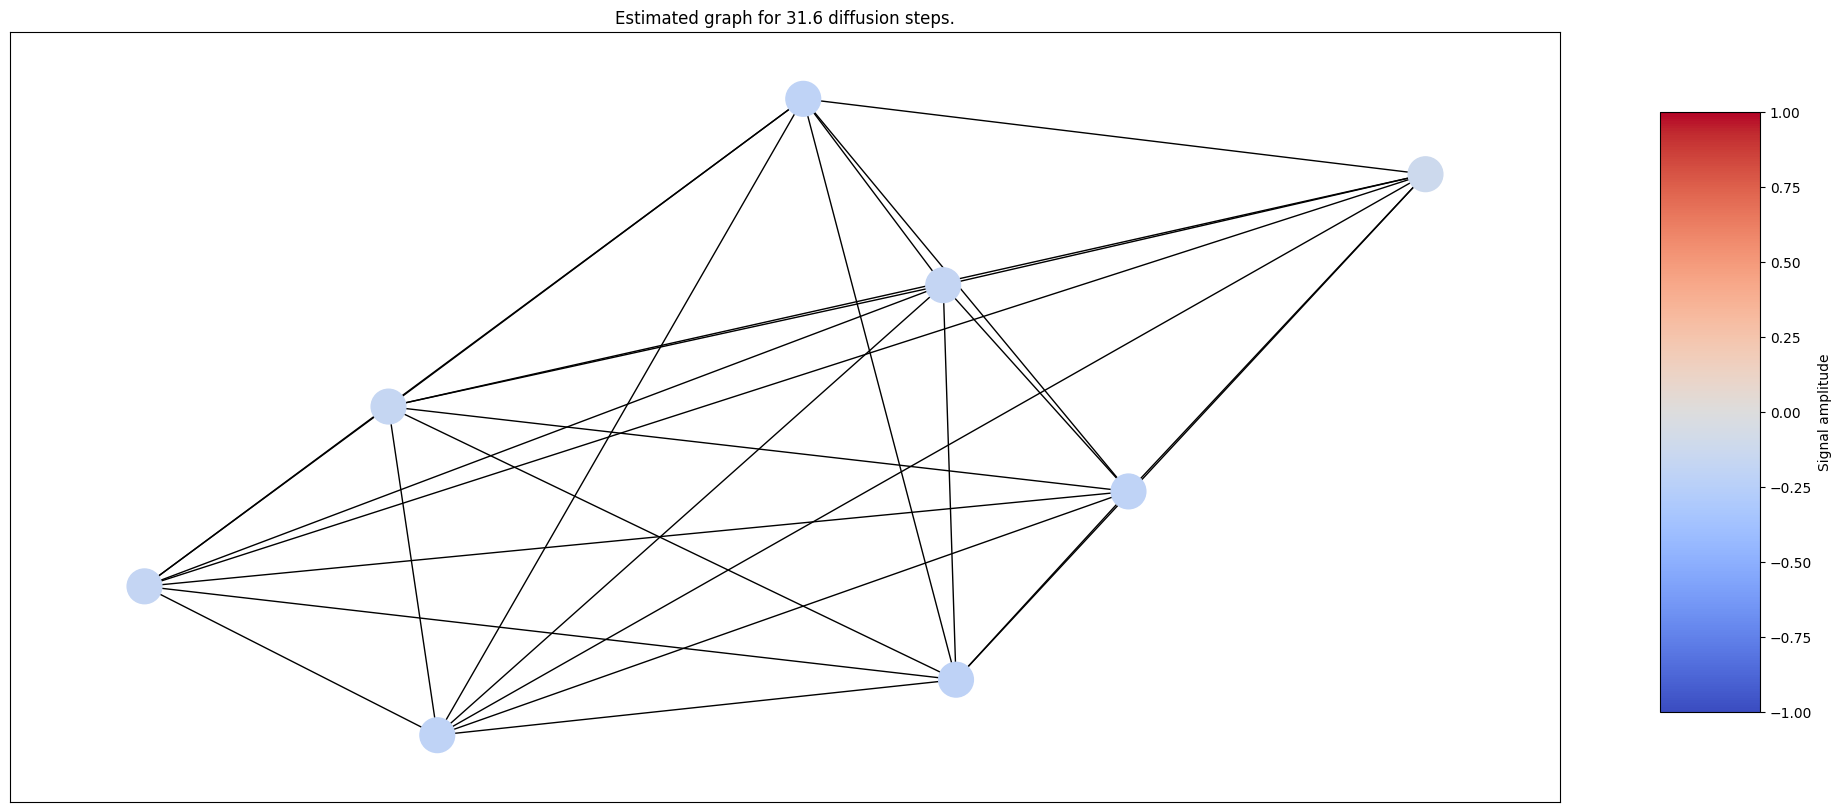

In [65]:
# Vizualize any graph in the matrix :
j=10
i=0
# print(f"Smoothness : {smoothnesses[i][j]}, distance {distances[i][j]}")
plot_graph(gt_graphs[i][j], labels=False, title=f"Ground truth graph")
i=0
plot_graph(reconstructed_graphs[i][j], value_range=value_range, labels=False, title=f"Estimated graph for {diffusion_steps[i]:.1f} diffusion steps.")
i=12
plot_graph(reconstructed_graphs[i][j], value_range=value_range, labels=False, title=f"Estimated graph for {diffusion_steps[i]:.1f} diffusion steps.")
i=-1
plot_graph(reconstructed_graphs[i][j], value_range=value_range, labels=False, title=f"Estimated graph for {diffusion_steps[i]:.1f} diffusion steps.")


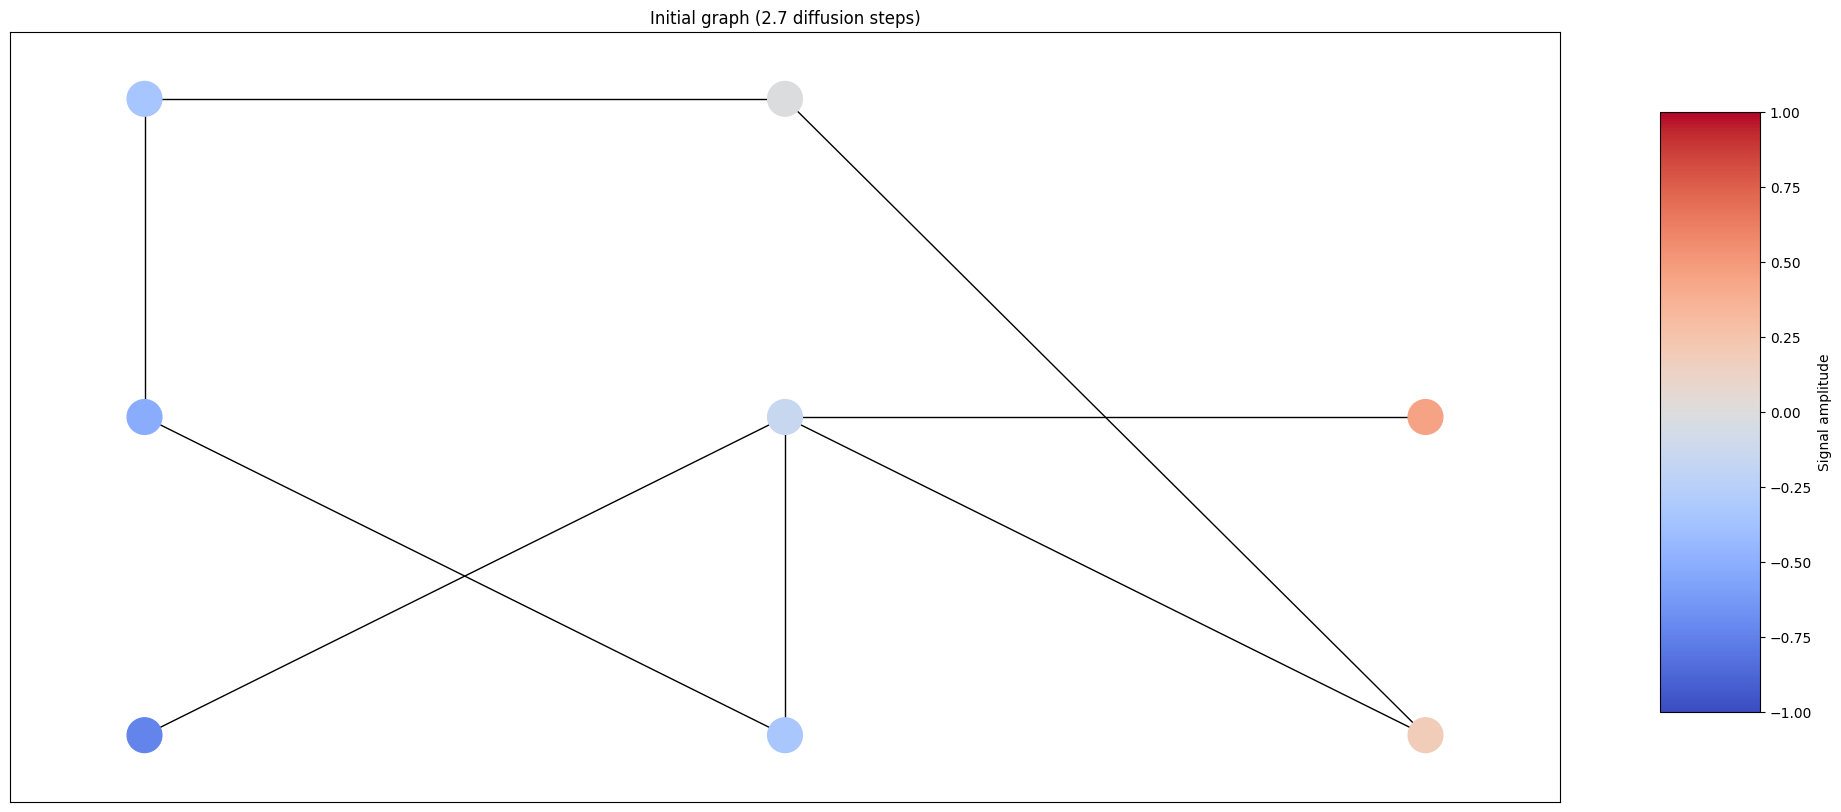

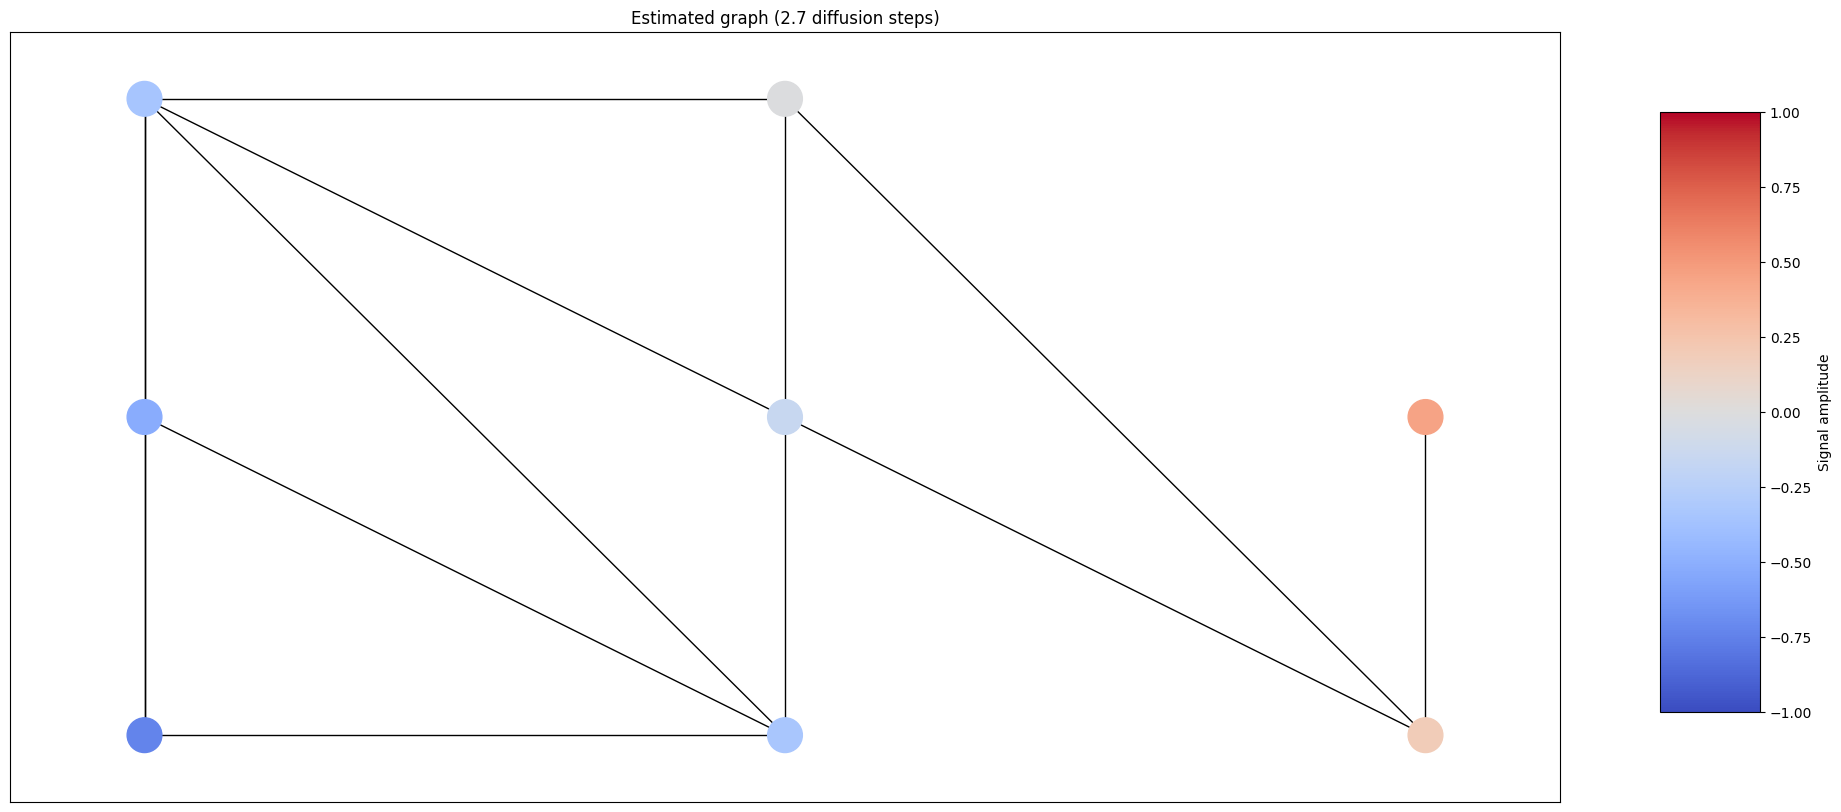

In [68]:
G = gt_graphs[i][j]
G_est = reconstructed_graphs[12][10]
for node in G.nodes():
    G.nodes[node]['value'] = G_est.nodes[node]['value'] #add signal

signal_init = [G_est.nodes[node]['value'] for node in G_est.nodes]
side_length = int(np.ceil(np.sqrt(len(G.nodes))))
pos_2D = [(x, y) for x in range(side_length) for y in range(side_length)]

signal = [G.nodes[node]['value'] for node in G_est.nodes]
edges = G.nodes
# Sort the two lists by signal values
combined = list(zip(signal_init, edges))
combined.sort(key=lambda x: x[0])
signal, edges = zip(*combined)
for i in range(len(edges)) :
    G.nodes[edges[i]]['pos'] = [pos_2D[i][0], pos_2D[i][1]]
    G_est.nodes[edges[i]]['pos'] = [pos_2D[i][0], pos_2D[i][1]]

plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph ({diffusion_steps[i]:.1f} diffusion steps)")
plot_graph(G_est, value_range=value_range, labels=False, title=f"Estimated graph ({diffusion_steps[i]:.1f} diffusion steps)")

### How much does the graph reconstruction vary with a temporally varying signal ?

In [40]:
# Estimate how much the reconstructed graphs differ from one another with the different diffusion steps
# The goal is to see how much the reconstruction varies when the signal varies over time

# Go through all the reconstructions of each of the N graphs and compute the graph edit distance between them
gw_distances = np.zeros((nb_graphs, len(diffusion_steps), len(diffusion_steps)))

for i in range(nb_graphs):
    for j in range(len(diffusion_steps)):
        for k in range(len(diffusion_steps)):
            #Compute the Gromov-Wasserstein distance between the two graphs
            gw_distances[i, j, k] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(reconstructed_graphs[j][i]), Graph(reconstructed_graphs[k][i]))

#Average the graph edit distances over the two last dimensions:
graph_edit_distances_avg = np.mean(gw_distances, axis=(1, 2))
print("Average Gromow-Wassestein distance between each reconstruction:\n", graph_edit_distances_avg)
print("avg: ", np.mean(graph_edit_distances_avg))
print("std: ", np.std(graph_edit_distances_avg))

Average Gromow-Wassestein distance between each reconstruction:
 [ 67.6758  62.3864 138.5194  82.6474 111.6027 118.9804  68.6152  86.5446
 119.1023 121.3002  54.8476  78.7641 117.6747  22.6811 240.5943 168.7506
  29.4227  82.8964  83.9771  80.3869 125.8682  92.246  110.4255  76.1689
   3.1704  79.8401 113.9627 157.3006 176.3134  81.5022 123.7893 105.6342
 246.4426 125.3527  82.4732 123.5543  60.2352  87.721   95.3391  71.9886
  65.2646  90.7408 143.4968 181.6373  36.1792 120.1127  91.7903 154.8601
 169.8349 146.2522 146.7485 145.5843  13.7996 107.9942  81.1556 106.8065
 140.648   68.1069 152.3857 154.7324 133.3926  56.09   118.9058  95.3709
 110.9039 134.6886 122.3614 144.9784  51.6607  94.3175 103.6056  64.1641
 119.1562  68.7282 132.5848  97.1079 120.1449 124.206  200.8345  87.4847
 100.4953 110.8255  71.9773 131.7251 113.3372 112.838  108.9135 136.8481
 132.3601 134.6115  75.8677 119.4294  23.492   80.3897 100.3493 140.6674
 122.1805  91.1826   0.6609 122.8625]
avg:  106.06529000000

In [41]:
print("avg: ", np.mean(graph_edit_distances_avg))
print("std: ", np.std(graph_edit_distances_avg))

avg:  106.06529000000222
std:  42.95955492880369


In [42]:
# Estimate how much the reconstructed graphs differ from one another with the different diffusion steps
# The goal is to see how much the reconstruction varies when the signal varies over time

# Go through all the reconstructions of each of the N graphs and compute the graph edit distance between them
gw_distances = np.zeros((nb_graphs, len(diffusion_steps), len(diffusion_steps)))

for i in range(nb_graphs):
    for j in range(len(diffusion_steps)//2, len(diffusion_steps)):
        for k in range(len(diffusion_steps)//2, len(diffusion_steps)):
            #Compute the Gromov-Wasserstein distance between the two graphs
            gw_distances[i, j, k] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(reconstructed_graphs[j][i]), Graph(reconstructed_graphs[k][i]))


#Remove the first half of the diffusion steps
gw_distances = gw_distances[:, len(diffusion_steps)//2:, len(diffusion_steps)//2:]
#Average the graph edit distances over the two last dimensions:
graph_edit_distances_avg = np.mean(gw_distances, axis=(1, 2))
print("Average Gromow-Wassestein distance between each reconstruction:\n", graph_edit_distances_avg)
print("avg: ", np.mean(graph_edit_distances_avg))
print("std: ", np.std(graph_edit_distances_avg))

Average Gromow-Wassestein distance between each reconstruction:
 [ 18.86464497  18.46190828  24.64275148  10.4341716   25.25628698
  30.77810651   0.93676036  54.71671598  66.47263314  66.97152367
   0.51886095   0.43343195   0.57877219   0.36168639  83.17640533
   0.69563609   0.51442308  78.89571006  42.94193787  68.43491124
  25.19378698  17.54881657  31.61279586   0.37315089   4.80510355
   0.4522929    0.21819527  64.32359467  72.08173077  67.76849112
   1.25295858   0.40273669 128.43158284  24.6397929   24.42492604
  25.04511834   0.66642012  24.60096154  25.91494083  26.13128698
   0.4704142   73.86279586  40.88239645  96.82877219   0.25480769
  43.9885355   10.61760355  41.76516272 114.32100592  22.72152367
  24.35502959  20.3964497   25.06989645  44.48224852  45.01738166
  24.33136095  73.68158284  19.21227811  18.42418639   0.84948225
  41.9308432   11.5410503   31.46190828   0.8010355   44.55436391
  86.2204142   44.5181213    0.97965976   0.15976331  61.14201183
  24.549556

In [43]:
print("avg: ", np.mean(graph_edit_distances_avg))
print("std: ", np.std(graph_edit_distances_avg))

avg:  31.588713017753236
std:  27.63253611810942


In [44]:
#Compute the average distance between the ground truth and reconstructed graphs using Gromov-Wasserstein distance
dist_gt_rec = np.zeros((len(diffusion_steps), nb_graphs))
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        dist_gt_rec[i, j] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[i][j]))

dist_gt_rec_avg = np.mean(dist_gt_rec, axis=1)
print("Average Gromow-Wassestein distance between each reconstruction:\n", dist_gt_rec_avg)
print("avg: ", np.mean(dist_gt_rec_avg))
print("std: ", np.std(dist_gt_rec_avg))

Average Gromow-Wassestein distance between each reconstruction:
 [157.374375  206.5396875 176.3740625 170.766875  174.68875   178.2778125
 165.8975    129.77375   135.7865625 144.624375  105.6040625 104.23
  81.998125   64.2059375  33.8078125  26.66       21.2065625  10.2640625
  15.248125    6.380625    9.91875     2.2428125   2.37125     3.75375
   1.8671875]
avg:  85.19451250000165
std:  71.53438923534651


In [45]:
#Compute the average distance between the ground truth and reconstructed graphs using Gromov-Wasserstein distance
dist_gt_rec = np.zeros((len(diffusion_steps), nb_graphs))
for i in range(len(diffusion_steps)//2, len(diffusion_steps)):
    for j in range(nb_graphs):
        dist_gt_rec[i, j] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[i][j]))

#Remove the first half of the diffusion steps
dist_gt_rec = dist_gt_rec[len(diffusion_steps)//2:, :]
#Compute the average distance between the ground truth and reconstructed graphs using Gromov-Wasserstein distance
dist_gt_rec_avg = np.mean(dist_gt_rec, axis=1)
print("Average Gromow-Wassestein distance between each reconstruction:\n", dist_gt_rec_avg)
print("avg: ", np.mean(dist_gt_rec_avg))
print("std: ", np.std(dist_gt_rec_avg))

Average Gromow-Wassestein distance between each reconstruction:
 [81.998125  64.2059375 33.8078125 26.66      21.2065625 10.2640625
 15.248125   6.380625   9.91875    2.2428125  2.37125    3.75375
  1.8671875]
avg:  21.532692307694
std:  24.222015467987116


### Graph reconstruction using a time-evolving signal

In [46]:
max_iter = 1000
alpha = 0.0004143793103448276# 1e-3 #5e-3
beta = 0.00039310344827586213#2e-3
solvers.options['show_progress'] = False
np.random.seed(3)

nb_graphs = 100  # Number of graphs to generate and test on
num_nodes = 8  # Number of nodes in each graph
num_edges = 8  # Number of edges in each graph
node_value_range = [-1, 1]  # Range of values that each node can take
edge_weight_range = [1, 1]  # Range of weights that each edge can take

diffusion_steps = np.logspace(0, 1.5, 25)  # Number of diffusion steps to test on

# Build the ground truth and reconstructed graphs for each diffusion step
gt_graphs = [[] for _ in range(len(diffusion_steps))]
reconstructed_graphs = [] #for each graph the goal is to reconstruct a graph using various diffusion timesteps

for i in range(nb_graphs):
    # Create a graph
    G0 = create_graph(num_nodes, num_edges, node_value_range, edge_weight_range = edge_weight_range)
    samples = []

    # Perform diffusion and plot the graph at each timestep
    for j, t in enumerate(diffusion_steps):
        G = diffusion(G0,  diffusion_steps = t)
        gt_graphs[j].append(G)

        #Sample the signal from the graph
        samples_t = sample_signal_from_graph(G, num_samples = 20, sampling_noise_std = 0.2)
        
        #Concatenate the samples_t to the samples
        if j == 0 :
            samples = samples_t
        else :
            samples = np.concatenate((samples, samples_t), axis=0)
        
    #Reconstruct the graph from the samples
    L_est, Y_est = gl_sig_model(samples, max_iter, alpha, beta)

    # Generate graph from Laplacian
    G_est = create_graph_from_laplacian(L_est, 1)
    for node in G_est.nodes():
        G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
        G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
    for edge in G_est.edges():
        G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

    reconstructed_graphs.append(G_est)


In [47]:
#For each reconstructed graph, compute the distance between the ground truth and reconstructed graphs using Fused Gromov-Wasserstein distance

d_gw = np.zeros((len(diffusion_steps), nb_graphs))
for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        d_gw[i, j] = Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='dirac',method='shortest_path').graph_d(Graph(gt_graphs[i][j]), Graph(reconstructed_graphs[j]))

#Compute the average and std for the distance between the ground truth and reconstructed graphs per graph
ds_gw = np.mean(d_gw, axis=0)
std_ds_gw = np.std(d_gw, axis=0)

print("avg dist: ", np.mean(ds_gw))
print("std dist: ", np.std(ds_gw))

avg dist:  191.43062500000235
std dist:  171.28419860283378


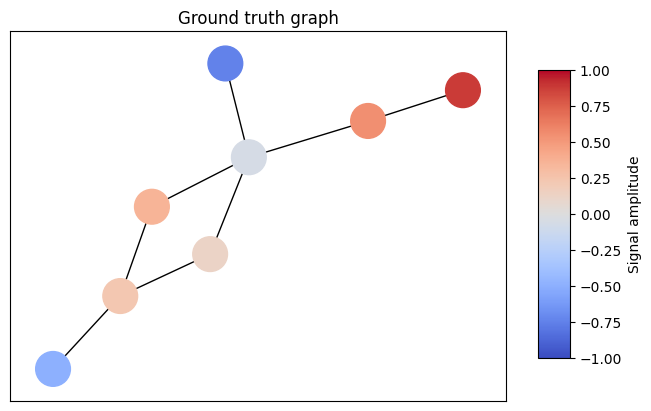

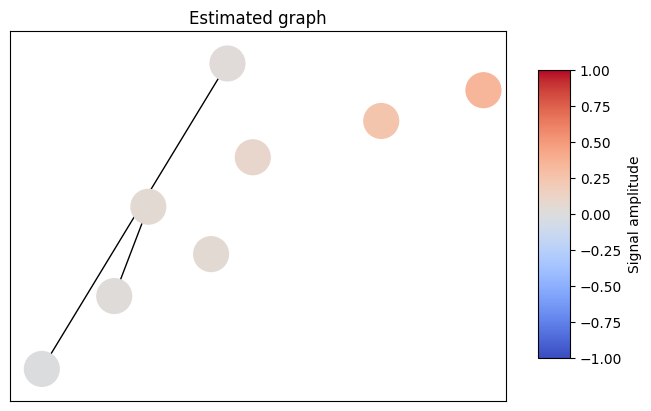

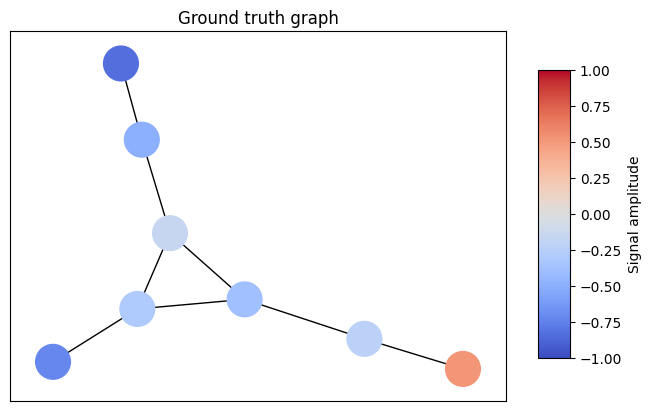

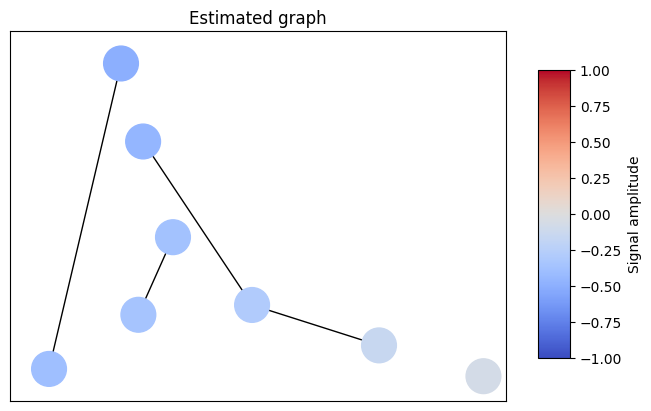

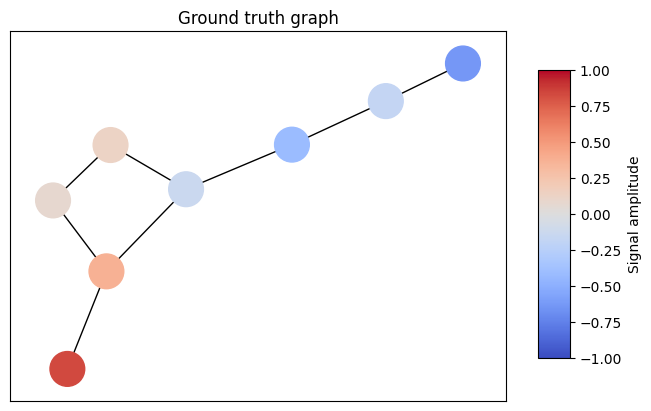

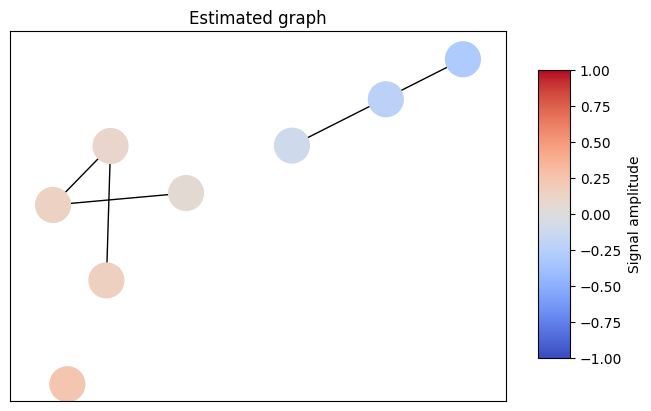

In [48]:
#Plot 3 examples of reconstructed graphs
for i in range(3):
    plot_graph(gt_graphs[10][i], value_range=value_range, labels=False, title=f"Ground truth graph")
    plot_graph(reconstructed_graphs[i], value_range=value_range, labels=False, title="Estimated graph")

The cell above shows that the reconstructed graph is quite "far away" to the original graph whatever the situation. How much of that is due to the node values is unclear...

In [49]:
#print the std of ds_gw:
print(np.mean(ds_gw))
print(np.std(ds_gw))

191.43062500000235
171.28419860283378


In [50]:
d_ge = np.zeros((len(diffusion_steps), nb_graphs))

for i in range(len(diffusion_steps)):
    for j in range(nb_graphs):
        d_ge[i, j] = nx.graph_edit_distance(gt_graphs[i][j], reconstructed_graphs[j])

#Compute the average and std for the distance between the ground truth and reconstructed graphs per graph
ds_ge = np.mean(d_ge, axis=0)
std_ds_ge = np.std(d_ge, axis=0)

print("Average graph edit distance between the ground truth and reconstructed graphs per graph: ", ds_ge)
print("Std for the graph edit distance between the ground truth and reconstructed graphs per graph: ", std_ds_ge)

KeyboardInterrupt: 